W tym przygotujesz obrazy ze zbioru danych **MNIST** do podania do sieci neuronowej. Jest to najbardziej powszechny zbiór danych, używany do klasyfikacji obrazów przy użyciu technologii Uczenia Maszynowego. 

Aby tego dokonać użyjesz biblioteki **Keras**, która w szybki sposób pozwoli zbudować sieć neuronową zdolną do dokonania takiej klasyfikacji z wysoką trafnością. 

Zbiór danych pochodzi ze strony: http://yann.lecun.com/exdb/mnist/. Składa się z dwóch mniejszych podzbiorów:
- treningowego (60000 obrazów czarno-białych o rozmiarze 28x28)
- testowego (10000 obrazów czarno-białych o rozmiarze 28x28)

Popularne zbiory danych używane w celach treningowych, są wbudowane w bibliotekę Keras, dzięki temu nie musimy sciągać danych z zewnątrz! 

Więcej na ten temat dostępne jest pod tym linkiem:

- https://keras.io/datasets/

## Wczytanie danych
Import obiektu ściagającego i wczytującego dane.

In [0]:
import keras

Ściągniecie podzbiorów: treningowy/testowy oraz ich etykiet.

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

## Wizualizacja danych
Teraz warto przyjrzeć się jak wyglądają nasze dane.


#### Czym są zmienne `X_train`, `y_train`, `X_test`, `y_test`?

In [77]:
print("- X_train type: {}\n- y_train type: {}\n- X_test type: {}\n- y_test type: {}\n".format(
    type(X_train), type(y_train), type(X_test), type(y_test)))

- X_train type: <class 'numpy.ndarray'>
- y_train type: <class 'numpy.ndarray'>
- X_test type: <class 'numpy.ndarray'>
- y_test type: <class 'numpy.ndarray'>



Jak widać są to obiety typu `ndarray`. Są to klasy bilbioteki *NumPy* (http://www.numpy.org/), powszechnie stosowanej biblioteki, będącej podstawą do obliczeń matematycznych w języku programowania Python. 

In [0]:
import numpy as np

Obiekty `ndarray` pozwalają traktować dane jako macierze a tym samym utrzymywać strukturę wielowymiarową np:

In [79]:
example = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print("Matrix shape: {}".format(example.shape))
print(example)

Matrix shape: (3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]


A tym samym pozwalają na bardziej zaawansowane operacje, takie jak operacje na macierzach:

In [80]:
print("Odejmowanie:\n{}".format(example - example))

Odejmowanie:
[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [81]:
print("Mnożenie:\n{}".format(example * example))

Mnożenie:
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


In [82]:
print("Transponowanie:\n{}".format(example.T))

Transponowanie:
[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [83]:
print("Operacje na liczbach:\n{}".format(example + 10))

Operacje na liczbach:
[[11 12 13]
 [14 15 16]
 [17 18 19]]


Ale również dają szybki dostęp do wygodnych funkcji takich jak `.mean()`, `std()`, `.max()`, `min()` i masa innych niesamowicie przydatnych funkcji:

In [84]:
print("Wartość minimalna: {}".format(example.min()))

Wartość minimalna: 1


In [85]:
print("Wartość maksymalna: {}".format(example.max()))

Wartość maksymalna: 9


In [86]:
print("Wrtość średnia: {}".format(example.mean()))

Wrtość średnia: 5.0


Dodatkowo można je traktować w bardzo podobny sposób jak listy w Pythonie: 

In [87]:
print("Dostęp po indeksie. W tym wypadku można traktować taką" \
      + " macierz jak listę zawierającą trzy inne listy:\n {}".format(example[1]))

Dostęp po indeksie. W tym wypadku można traktować taką macierz jak listę zawierającą trzy inne listy:
 [4 5 6]


In [88]:
print("A następnie do zwróconego wiersza macierzy (który można traktować jako lista)" \
      + " można się ponownie odwołać po indeksie:\n {}".format(example[1][0]))

A następnie do zwróconego wiersza macierzy (który można traktować jako lista) można się ponownie odwołać po indeksie:
 4


In [89]:
print("Szczególnie wygodną funkcją jest możliwość iterowania po ndarrayach tak samo jak po listach!")

for row in example:
    print(row)
    
print()

for number in example[1]:
    print(number)

Szczególnie wygodną funkcją jest możliwość iterowania po ndarrayach tak samo jak po listach!
[1 2 3]
[4 5 6]
[7 8 9]

4
5
6


Jeżeli nie miałeś/aś styczności z biblioteką `NumPy` do tej pory to polecam rzucić okiem na to repozytorium na GitHubie, które zawiera dużo świetnych przykładów oraz ćwiczeń:

- https://github.com/rougier/numpy-100

#### Co znajduje sie wewnątrz zmiennych `ndarray`?
W Uczeniu Maszynowym przyjęło się za `X` traktować dane a za `y` oczekiwane wartości jakie model powinien zwrócić dla tych danych, tzw. `etykiety`.

Jeżeli popatrzymy na kształt obiektów ndarray `X_train` oraz `X_test` to możemy zaobserwować:

In [90]:
print("Kształt obiektu 'X_train': {}".format(X_train.shape))
print("Kształt obiektu 'X_test': {}".format(X_test.shape))

Kształt obiektu 'X_train': (60000, 28, 28)
Kształt obiektu 'X_test': (10000, 28, 28)


Czyli można traktować obiekty `X_train` oraz `X_test` jako liste macierzy o kształcie (28, 28) - które są obrazami o wymiarach 28x28 pikseli.

Aby odnieść się do obrazu:

In [91]:
indeks = 1251

print("Przykładowy obraz rozmiar: {}".format(X_train[indeks].shape))
print("Przykładowy obraz min: {}".format(X_train[indeks].min()))
print("Przykładowy obraz max: {}".format(X_train[indeks].max()))
print("Przykładowy obraz:\n{}".format(X_train[indeks]))

Przykładowy obraz rozmiar: (28, 28)
Przykładowy obraz min: 0
Przykładowy obraz max: 255
Przykładowy obraz:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  58 121 241 254 254
  201   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  86 206 170 241 170 241 248 253 253 253 253


#### Ile mamy danych?

- Ilość próbek

In [92]:
print("Ilość próbek w X_train: {}".format(X_train.shape[0]))
print("Ilość próbek w X_test: {}".format(X_test.shape[0]))

Ilość próbek w X_train: 60000
Ilość próbek w X_test: 10000


- Ilość etykiet:

In [93]:
print("Ilość etykiet w y_train: {}".format(y_train.shape[0]))
print("Ilość etykiet w y_test: {}".format(y_test.shape[0]))

Ilość etykiet w y_train: 60000
Ilość etykiet w y_test: 10000


## Wyświetlenie obrazów

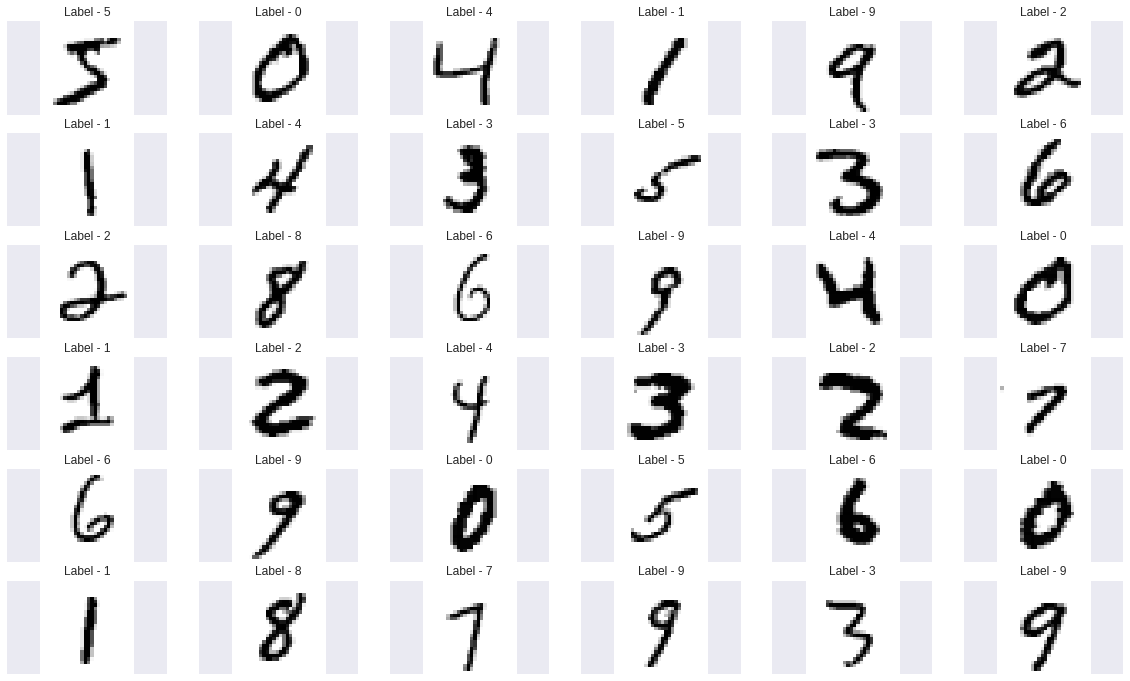

In [94]:
import matplotlib.pyplot as plt
% matplotlib inline

def show_digits(X_train, y_train, rows_num=6):    
    figure, axes = plt.subplots(nrows=rows_num, ncols=6, sharex=True, sharey=True, figsize=(20, rows_num * 2))
    
    for row_index in range(rows_num):
        ax_row = axes[row_index]
        images = X_train[(row_index*8):(row_index+1)*8]
        labels = y_train[(row_index*8):(row_index+1)*8]
        
        for ax, img, label in zip(ax_row, images, labels):
            ax.imshow(img, cmap='gray_r')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax.set_title("Label - {}".format(label))
            
show_digits(X_train, y_train)

### 1.0 Normalizacja danych

#### Teoria
W przypadku pracy na obrazach najczęsciej stosuje się normalizacje typu `Feature Scaling`

$$
x'={\frac  {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}
$$

Ale jako, że pracujemy z obrazami, zakres wartości piksela to `0-255` więc `wartość minimalna będzie wynosić 0` stąd wzór można uprościć do:

$$
x'={\frac  {x}{255}}
$$

#### Zadanie
- Znormalizuj macierze z obrazami `X_train` oraz `X_test` dzieląc je przez wartość `255`.
- Zapisz rezultat w innych zmiennych aby nie nadpisywać danych wejściowych.

In [0]:
X_train_normalized = X_train / 255
X_test_normalized = X_test / 255

In [96]:
X_train_normalized.min()

0.0

In [97]:
X_train_normalized.max()

1.0

### 2.0 Rozwinięcie obrazu do wektora
#### Teoria
Podstawowa sieć neuronowa (typu Perceptron Wielowarstwowy) przyjmuje na wejście wektor liczb. W tej chwili **obrazy są macierzami 28x28** a tym samym należy je **rozwinąć** do wektora:

<img src="https://ml4a.github.io/images/figures/mnist-input.png" width="800">

Oznacza to, że trzeba bedzie zmienić kształt (shape) macierzy X_train oraz X_test z (n, 28, 28) na (n, 28*28). Aby tego dokonać można użyć funkckji `.reshape` z biblioteki `NumPy`:

    ndarray_po_transformacji = ndarray_aktualny.reshape(ilość_obrazów, ilość_pikseli_w_obrazie)
   
#### Zadanie
- Użyj funkcji `.reshape` na macierzach obiektach ndarray `X_train`, `X_test` tak by nie przechowywały macierzy (28,28) a wektory o długości (784).

In [98]:
X_test_normalized.shape

(10000, 28, 28)

In [99]:
28* 28

784

In [0]:
X_train_reshaped = X_train_normalized.reshape(60000, 784)
X_test_reshaped = X_test_normalized.reshape(10000, 784)

In [101]:
X_train_reshaped.shape

(60000, 784)

In [102]:
X_test_reshaped.shape

(10000, 784)

### 3.0 One-Hot-Encoding
#### Teoria
Czyli operacja przekształcenia etykiet będących liczbami na wektory prawdopodobieństwa dla każdej klasy. Ilość etykiet:

In [103]:
y_test[3232]

4

In [104]:
print("Etykiety: {}".format(set(y_test)))

Etykiety: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Sieć neuronowa będzie miała **10 neuronów wyjściowych** po to by na każdym zwrócić **prawdopodobieństwo na ile liczba podana na wejście do sieci przypomina każdą z klas**:

<img src="https://www.dropbox.com/s/5pln1fn5up3cdcv/ohe_pred.png?dl=1" width="600">

A tym samym przykładowe **wektor wyjściowy z sieci** dla takiego obrazu przestawiającego cyfre 4 może wyglądać tak:



$$
[0, 0, 0, 0.01, 0.72, 0.07, 0, 0.02, 0.01, 0.17]
$$

Pozycja 5 wektora reprezentuje **klasę 4** więc **pradopodobieństwo**, że obraz wejściowy jest cyfrą 4 jest najwyższe. 

<img src="https://www.dropbox.com/s/3r2gz1820orajpc/ohe_explained.png?dl=1" width="600">

Keras pozwala na bardzo szybkie dokonanie one-hot encodingu etykiet przy pomocy funkcji `to_categorical` zawartej w submodule `utils`. Przykładowe użycie:

    keras.utils.to_categorical(lista_etykiet, ilość_unikalnych_wartości_w_liście) 

In [105]:
example_labels = np.array([0, 1, 2, 3, 1, 1, 2])
print("Before OHE:\n {}".format(example_labels))

example_labels_ohe = keras.utils.to_categorical(example_labels, 4)
print("\nAfter OHE:\n {}".format(example_labels_ohe))

Before OHE:
 [0 1 2 3 1 1 2]

After OHE:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


#### Zadanie
Dokonaj one-hot encodingu etykiet w obiektach ndarray `y_train` oraz `y_test`.

In [106]:
print("Example 'y_train' before One-Hot Encoding:\n {}\n {}".format(y_train[152], y_train[5332]))
print("Example 'y_test' before One-Hot Encoding:\n {}\n {}".format(y_test[694], y_test[1234]))

y_train_ohe = keras.utils.to_categorical(y_train, 10)
y_test_ohe =  keras.utils.to_categorical(y_test, 10)

print("Example 'y_train' after One-Hot Encoding:\n {}\n {}".format(y_train_ohe[152], y_train_ohe[5332]))
print("Example 'y_test' after One-Hot Encoding:\n {}\n {}".format(y_test_ohe[694], y_test_ohe[1234]))

Example 'y_train' before One-Hot Encoding:
 1
 3
Example 'y_test' before One-Hot Encoding:
 5
 8
Example 'y_train' after One-Hot Encoding:
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Example 'y_test' after One-Hot Encoding:
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


### 4.0 Podział danych
#### Teoria
Zwykle dzielimy nasze dane na trzy różne podzbiory:
- **zbiór treningowy** - używa się go trenowania modelu
- **zbiór walidacyjny** - po wytrenowaniu modelu testujemy jak działa model, jeżeli rezultaty są niewystarczająco dobre wtedy można zmienić `hiperparametry` modelu i ponownie wytrenować nowy model na **zbiorze treningowym**. Taką pętlę się powtarza aż rezultat będzie satysfakcjonujący.
- **zbiór testowy** - ten zbiór ma symulować dane produkcyjne, a tym samym nie powinniśmy na niego patrzeć, sugerować się nim i poddać model ostatecznemu testowi 

<img src="https://www.dropbox.com/s/gyuwuvv2saykfmk/data_split_role.png?dl=1" width="600">

#### Dobra praktyka
Dodatkowo przy podziale danych, dobrze jest pamiętać o tym by **w każdym zbiorze danych znalazła się taki sam procent próbek każdej klasy** jeżeli mamy bardzo niezbalansowaną ilość klas (próbek jakiejś klasy jest bardzo mało w stosunku do reszty). Dane zostały już podzielone w bibliotece Keras na biory testowy oraz treningowy. Rozkład klas w każdym zbiorze prezentuje się następująco:

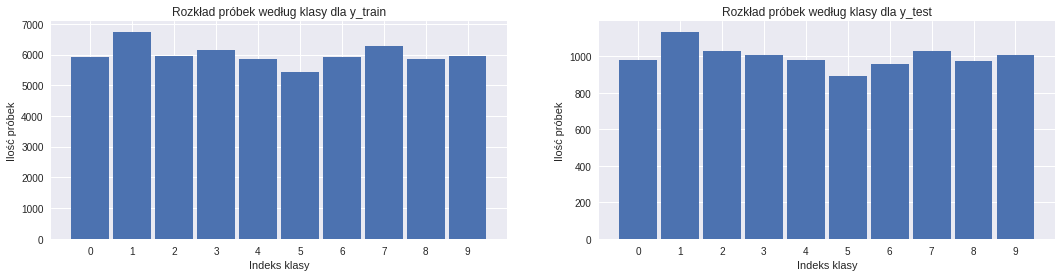

In [107]:
fig, axarray = plt.subplots(1, 2)
fig.set_size_inches(18, 4)
axarray[0].hist(y_train, bins=10, rwidth=0.9)
axarray[0].set_ylabel("Ilość próbek")
axarray[0].set_xlabel("Indeks klasy")
axarray[0].set_title("Rozkład próbek według klasy dla y_train")
axarray[0].set_xticks(np.arange(0, 10, 1) * 0.9 + 0.45)
axarray[0].set_xticklabels(range(0,10));

axarray[1].hist(y_test, bins=10, rwidth=0.9)
axarray[1].set_ylabel("Ilość próbek")
axarray[1].set_xlabel("Indeks klasy")
axarray[1].set_title("Rozkład próbek według klasy dla y_test")
axarray[1].set_xticks(np.arange(0, 10, 1) * 0.9 + 0.45)
axarray[1].set_xticklabels(range(0,10));

Taki podział danych nazywa się **Stratified Split**.

#### Zadanie
Podziel w proporcji **0.8/0.2**:
- `X_train_reshaped` na zbiór `X_train_input` oraz `X_val_input`,
- `y_train_ohe` na zbiór `y_train_input` oraz`y_val_inout`.

**Nie musisz się martwić proporcją klas, gdyż ilość próbek każdej klasy jest bardzo zbliżona!**

Wskazówka:

In [108]:
example_data = np.arange(0, 50, 1)
print("Wszystkie dane:\n {}".format(example_data))

split_index = 10
print("\nCzęść 1 (20% danych):\n{}".format(example_data[:10]))
print("\nCześć 2 (80% danych):\n{}".format(example_data[10:]))

Wszystkie dane:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]

Część 1 (20% danych):
[0 1 2 3 4 5 6 7 8 9]

Cześć 2 (80% danych):
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


Teraz Twoja kolej. 
- Posłuż się funkcją `.shape` aby dowiedzieć się ile próbek jest w obiekcie ndarray `X_train_reshaped`.
- Przemnóż tą wartość przez `split_ratio` aby uzyskać `split_index`. 

In [109]:
 X_train_reshaped.shape

(60000, 784)

In [110]:
 X_train_reshaped[:].shape

(60000, 784)

In [111]:
X_train_input.shape

(48000, 784)

In [0]:
split_ratio = 0.8
split_index = int(X_train_reshaped.shape[0] * split_ratio)

X_train_input = X_train_reshaped[:split_index]
X_val_input = X_train_reshaped[split_index:]

y_train_input = y_train_ohe[:split_index]
y_val_input = y_train_ohe[split_index:]

In [113]:
X_train_input.shape

(48000, 784)

In [114]:
y_train_input.shape

(48000, 10)

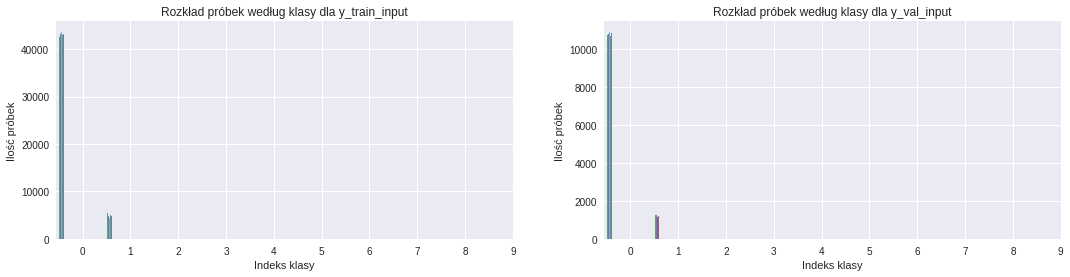

In [115]:
fig, axarray = plt.subplots(1, 2)
fig.set_size_inches(18, 4)
axarray[0].hist(y_train_input, bins=10, rwidth=0.9)
axarray[0].set_ylabel("Ilość próbek")
axarray[0].set_xlabel("Indeks klasy")
axarray[0].set_title("Rozkład próbek według klasy dla y_train_input")
axarray[0].set_xticks(np.arange(0, 10, 1) * 0.9 + 0.45)
axarray[0].set_xticklabels(range(0,10));

axarray[1].hist(y_val_input, bins=10, rwidth=0.9)
axarray[1].set_ylabel("Ilość próbek")
axarray[1].set_xlabel("Indeks klasy")
axarray[1].set_title("Rozkład próbek według klasy dla y_val_input")
axarray[1].set_xticks(np.arange(0, 10, 1) * 0.9 + 0.45)
axarray[1].set_xticklabels(range(0,10));

### 5.0 Funkcja  przygotowująca dane
Dobrą praktyką programistyczną jest napisanie funkcji, która bedzie przetwarzała dane i przygotowywała je do podania sieci neuronowej. Ta funkcja, przyda nam się w tych warsztatach jeszcze wiele razy i przyśpieszy pracę.

#### Zadanie
Napisz funkcję `preprocess_data_mlp(X_train, y_train, X_test, y_test)`, która zwróci dane:
- znormalizowane,
- obrazy rozwinięte do wektora,
- etykiety po one-hot-encodingu,
- dane treningowe podzielone na zbiór treningowy oraz walidacyjny w stosunku 0.8/0.2

Tak naprawdę cały kod został już napisany. Wystarczy, że przekopiujesz odpowiednie fragmenty kodu we właściwe sekcje.

In [0]:
def preprocess_data_mlp(X_train, y_train, X_test, y_test, split_ratio, image_height, image_width):
    # Znormalizuj dane
    X_train_normalized = X_train / 255
    X_test_normalized = X_test / 255
    
    # Rozwiń obrazy do wektora
    X_train_reshaped = X_train_normalized.reshape(-1, image_height*image_width)
    X_test_reshaped = X_test_normalized.reshape(-1, image_height*image_width)
      
    # One-Hot Encoding
    y_train_ohe = keras.utils.to_categorical(y_train, len(set(y_train)))
    y_test_ohe =  keras.utils.to_categorical(y_test, len(set(y_test)))
    
    # Podziel dane na zbiory treningowy oraz walidacyjny
    split_index = int(X_train_reshaped.shape[0] * split_ratio)

    X_train_input = X_train_reshaped[:split_index]
    X_val_input = X_train_reshaped[split_index:]

    y_train_input = y_train_ohe[:split_index]
    y_val_input = y_train_ohe[split_index:]
    
    # Zapisz dane w dictionary
    data = {
        "X_train_input": X_train_input,
        "y_train_input": y_train_input,
        "X_val_input": X_val_input,
        "y_val_input": y_val_input,
        "X_test_input": X_test_reshaped,
        "y_test_input": y_test_ohe
    }
    
    return data

Użyj funkcji by przygotować dane:

In [0]:
data = preprocess_data_mlp(X_train, y_train, X_test, y_test, 0.8, 28, 28)

### 6.0 Sprawdzenie

In [0]:
assert "X_train_input" in data
assert "y_train_input" in data
assert "X_val_input" in data
assert "y_val_input" in data
assert "X_test_input" in data
assert "y_test_input" in data

assert data["X_train_input"].shape == (48000, 784)
assert data["y_train_input"].shape == (48000, 10)
assert data["X_val_input"].shape == (12000, 784)
assert data["y_val_input"].shape == (12000, 10)
assert data["X_test_input"].shape == (10000, 784)
assert data["y_test_input"].shape == (10000, 10)

assert data["X_train_input"].max() == 1
assert data["X_train_input"].min() == 0
assert data["X_val_input"].max() == 1
assert data["X_val_input"].min() == 0
assert data["X_test_input"].max() == 1
assert data["X_test_input"].min() == 0